In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 23.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 349 kB/s 
     |████████████████████████████████| 453 kB 54.6 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-06-27 07:44:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (b

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f9a49c20290>)

In [ ]:
total_data = pd.read_table('ratings_total.txt',names=['ratings','reviews'])
print('전체 리뷰 개수 :',len(total_data))

전체 리뷰 개수 : 200000


In [ ]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(),total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
print("총 샘플의 수 :",len(total_data))

총 샘플의 수 : 199908


In [ ]:
print(total_data.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(total_data,test_size=0.25,random_state=42)
print('훈련용 리뷰의 개수 :',len(train_data))
print('테스트용 리뷰의 개수 :',len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


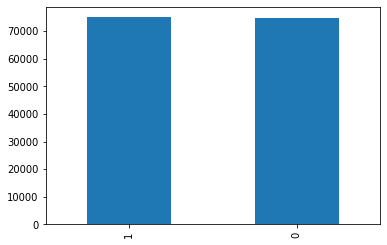

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  74918
1      1  75013


In [ ]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train_data['reviews'].replace('',np.nan,inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


ratings    0
reviews    0
label      0
dtype: int64


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
test_data['reviews'].replace('',np.nan,inplace=True)
test_data = test_data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
mecab = Mecab()
print(mecab.morphs("와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔"))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x : [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 29687), ('는데', 19748), ('안', 18779), ('어요', 13799), ('있', 12927), ('너무', 12576), ('했', 11492), ('좋', 9463), ('배송', 9452), ('어', 8929), ('같', 8631), ('구매', 8540), ('거', 8379), ('없', 8264), ('습니다', 8209), ('되', 8130), ('아요', 8054), ('그냥', 7927), ('않', 7757), ('잘', 7576)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 38612), ('아요', 20203), ('네요', 18965), ('잘', 18036), ('어요', 17891), ('구매', 15799), ('습니다', 13113), ('있', 12211), ('배송', 11939), ('는데', 11436), ('했', 9645), ('합니다', 9553), ('먹', 9457), ('재', 9064), ('너무', 8148), ('같', 7640), ('만족', 7071), ('어', 6628), ('아', 6531), ('거', 6261)]


긍정 리뷰의 평균 길이 : 13.229400237292202
부정 리뷰의 평균 길이 : 16.35456098667877


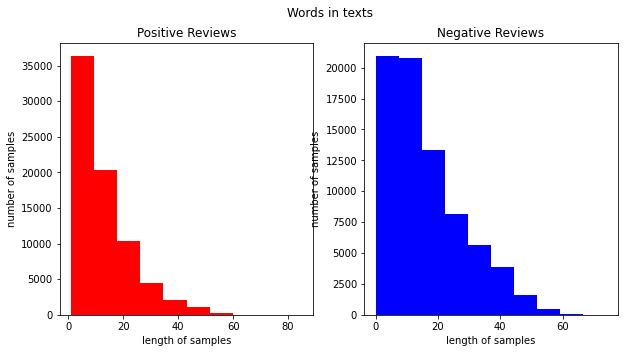

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :',np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len,color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :',np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key,value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if (value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:',(rare_cnt/total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:",(rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기 : 51331
등장 빈도가 1번 이하인 희귀 단어의 수 : 27839
단어 집합에서 희귀 단어의 비율: 54.23428337651711
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.255350311233444


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 23494


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[64, 2081, 296, 14978, 257, 71, 6, 243, 163, 134, 783, 3060, 626, 2, 1], [457, 408, 50, 8676, 25, 1], [43, 24, 837, 111, 36, 2439, 179, 7, 10, 8171, 4, 1257, 29, 137, 320, 44, 58, 179, 137, 7, 1913, 1996, 109, 162, 1414, 330, 121, 135]]


In [ ]:
print(X_test[:3])

[[14, 690, 749, 112, 187, 246, 12], [334, 3869, 62, 4182, 1633], [11, 68, 2, 48, 156, 3, 27, 15, 6, 555, 285, 16, 90, 108, 589, 58, 7, 2]]


리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 14.790990522306927


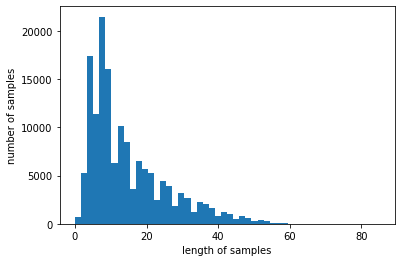

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len,X_train))/len(X_train))
plt.hist([len(review) for review in X_train],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len,nested_list):
  count = 0
  for sentence in nested_list:
    if (len(sentence) <= max_len):
      count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 :%s'%(max_len,(count/ len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len,X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율 :99.99933302652553


In [ ]:
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1,activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=4)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train,epochs=15,callbacks=[es,mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2836 - acc: 0.8899
Epoch 1: val_acc improved from -inf to 0.91373, saving model to best_model.h5
1875/1875 [==============================] - 305s 160ms/step - loss: 0.2836 - acc: 0.8899 - val_loss: 0.2338 - val_acc: 0.9137
Epoch 2/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2267 - acc: 0.9155
Epoch 2: val_acc improved from 0.91373 to 0.91590, saving model to best_model.h5
1875/1875 [==============================] - 296s 158ms/step - loss: 0.2267 - acc: 0.9155 - val_loss: 0.2253 - val_acc: 0.9159
Epoch 3/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2091 - acc: 0.9232
Epoch 3: val_acc improved from 0.91590 to 0.91770, saving model to best_model.h5
1875/1875 [==============================] - 294s 157ms/step - loss: 0.2091 - acc: 0.9232 - val_loss: 0.2205 - val_acc: 0.9177
Epoch 4/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1974 - acc: 0.9278
Epoch 4

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f"%(loaded_model.evaluate(X_test,y_test)[1]))

1562/1562 [==============================] - 7s 4ms/step - loss: 0.2099 - acc: 0.9242

 테스트 정확도: 0.9242


In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]','',new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded,maxlen=max_len)

  score = float(loaded_model.predict(pad_new))
  if (score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score*100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1-score)*100))    

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

97.70% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')

99.65% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('판매자님... 너무 짱이에요.. 대박나삼')

97.86% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아')

64.80% 확률로 부정 리뷰입니다.


In [15]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 20.01 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-06-27 14:39:55--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseru

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="steam.txt")

('steam.txt', <http.client.HTTPMessage at 0x7f0cfdc959d0>)

In [18]:
total_data = pd.read_table('steam.txt',names=['label','reviews'])
print('전체 리뷰 개수 :',len(total_data))

전체 리뷰 개수 : 100000


In [19]:
total_data[:5]

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [20]:
total_data['reviews'].nunique(),total_data['label'].nunique()

(99892, 2)

In [21]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
print('총 샘플의 수:',len(total_data))

총 샘플의 수: 99892


In [22]:
print(total_data.isnull().values.any())

False


In [23]:
train_data,test_data = train_test_split(total_data,test_size=0.25,random_state=42)
print('훈련용 리뷰의 개수 :',len(train_data))
print('테스트용 리뷰의 개수 :',len(test_data))

훈련용 리뷰의 개수 : 74919
테스트용 리뷰의 개수 : 24973


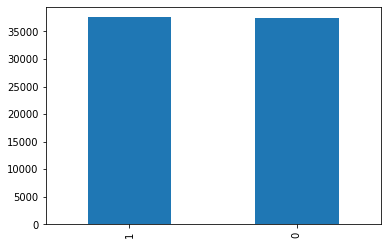

In [24]:
train_data['label'].value_counts().plot(kind='bar')

In [25]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  37376
1      1  37543


In [26]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
train_data['reviews'].replace('',np.nan,inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


label      0
reviews    0
dtype: int64


In [27]:
test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'].replace('',np.nan,inplace=True)
test_data = test_data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 24973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [29]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [30]:
mecab = Mecab()
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x : [item for item in x if item not in stopwords])

In [31]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [32]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 7795), ('없', 6816), ('는데', 5605), ('있', 5564), ('같', 4118), ('로', 4025), ('할', 3801), ('거', 3674), ('해', 3529), ('나', 3522), ('너무', 3453), ('으로', 3301), ('기', 3209), ('했', 3195), ('어', 3110), ('지만', 2937), ('습니다', 2912), ('것', 2875), ('좋', 2856), ('않', 2852)]


In [33]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 9772), ('좋', 6388), ('습니다', 5082), ('지만', 4822), ('할', 4707), ('재밌', 4635), ('해', 4194), ('없', 4020), ('으로', 3855), ('로', 3787), ('수', 3749), ('보', 3728), ('는데', 3661), ('기', 3490), ('것', 3322), ('같', 3289), ('안', 3197), ('어', 3114), ('네요', 3030), ('나', 2955)]


긍정 리뷰의 평균 길이 : 14.59443837732733
부정 리뷰의 평균 길이 : 14.878371147260275


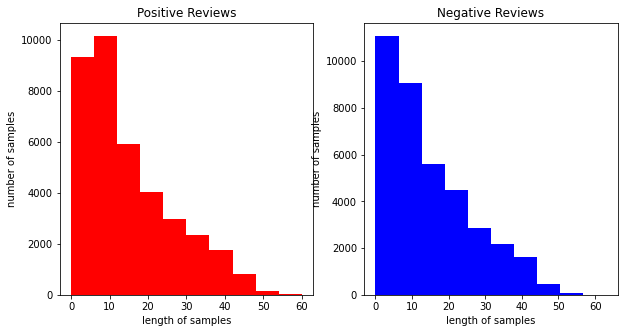

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x : len(x))
ax1.hist(text_len,color='red')
ax1.set_title("Positive Reviews")
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :',np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x : len(x))
ax2.hist(text_len,color='blue')
ax2.set_title("Negative Reviews")
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :',np.mean(text_len))
plt.show()

In [36]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = test_data['tokenized'].values
y_test = test_data['label'].values

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [38]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if (value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:',(rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :',(rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 39955
등장 빈도가 1번 이하인 희귀 단어의 수 : 19646
단어 집합에서 희귀 단어의 비율: 49.170316606181956
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 1.77950803115543


In [39]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 20311


In [40]:
tokenizer = Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [41]:
print(X_train[:3])

[[465, 628, 7, 34, 86, 146, 2412, 589, 25, 8, 70, 47, 225, 109, 36, 42, 50], [181, 326, 20, 21, 61, 3707, 968, 6, 53], [7, 17, 1479, 4]]


In [42]:
print(X_test[:3])

[[705, 37, 16, 439, 50, 108, 132, 90, 6513, 530], [4519, 669, 839, 693, 668, 110, 4, 1747, 92, 425, 3459, 78, 536, 1952, 4169, 258, 163, 60, 26, 350, 34, 86, 1005, 19, 6685, 6468], [1639, 763, 558, 44, 24, 358]]


리뷰의 최대 길이 : 63
리뷰의 평균 길이 : 14.736088308706737


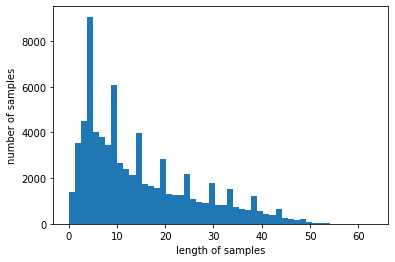

In [43]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len,X_train))/len(X_train))
plt.hist([len(review) for review in X_train],bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [44]:
def below_threshold_len(max_len,nested_list):
  count = 0
  for sentence in nested_list:
    if (len(sentence) <= max_len):
      count += 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len,(count/len(nested_list))*100))

In [45]:
max_len = 60
below_threshold_len(max_len,X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 99.99733045021956


In [46]:
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [47]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(1,activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train,epochs=15,callbacks=[es,mc],batch_size=256,validation_split=0.2)

Epoch 1/15
233/235 [============================>.] - ETA: 0s - loss: 0.5322 - acc: 0.7411
Epoch 1: val_acc improved from -inf to 0.77469, saving model to best_model.h5
235/235 [==============================] - 18s 27ms/step - loss: 0.5318 - acc: 0.7414 - val_loss: 0.4884 - val_acc: 0.7747
Epoch 2/15
233/235 [============================>.] - ETA: 0s - loss: 0.4402 - acc: 0.7971
Epoch 2: val_acc did not improve from 0.77469
235/235 [==============================] - 5s 21ms/step - loss: 0.4403 - acc: 0.7970 - val_loss: 0.4889 - val_acc: 0.7727
Epoch 3/15
234/235 [============================>.] - ETA: 0s - loss: 0.4142 - acc: 0.8121
Epoch 3: val_acc did not improve from 0.77469
235/235 [==============================] - 5s 21ms/step - loss: 0.4142 - acc: 0.8121 - val_loss: 0.4852 - val_acc: 0.7678
Epoch 4/15
233/235 [============================>.] - ETA: 0s - loss: 0.3939 - acc: 0.8240
Epoch 4: val_acc improved from 0.77469 to 0.77629, saving model to best_model.h5
235/235 [=========

In [48]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" %(loaded_model.evaluate(X_test,y_test)[1]))

781/781 [==============================] - 7s 8ms/step - loss: 0.4700 - acc: 0.7837
테스트 정확도: 0.7837


In [49]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]','',new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded,maxlen=max_len)
  score = float(loaded_model.predict(pad_new))
  if (score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score*100)) 
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1-score)*100))    

In [50]:
sentiment_predict('노잼 .. 완전 재미 없음 ㅉㅉ')

97.49% 확률로 부정 리뷰입니다.


In [51]:
sentiment_predict('조금 어렵지만 재밌음ㅋㅋ')

98.37% 확률로 긍정 리뷰입니다.


In [53]:
sentiment_predict('캐릭터가 예뻐서 좋아요')

94.73% 확률로 긍정 리뷰입니다.
